http://localhost:8888/notebooks/02-Topic/P05-NLP/SentimentAnalysis.ipynb 

http://localhost:8888/notebooks/0-MyCollection/LondonAirbnb/8-LondonAb-Review.ipynb 

http://localhost:8888/notebooks/0-MyCollection/LondonAirbnb/8-LondonAb-Recommendation.ipynb

In [104]:
# Dataframe manipulation
import numpy as np
import pandas as pd

#Import plotting packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import matplotlib.cm as cmx
import matplotlib.colors as colors
# plt.style.use('fivethirtyeight')
sns.set(style = 'whitegrid',context = 'notebook')

# NLP
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import string
import nltk
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from collections import Counter
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.stem import SnowballStemmer
import string
from scipy.spatial.distance import pdist, squareform
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
from sklearn.metrics.pairwise import cosine_similarity

from langdetect import detect

#Import common utilities
import math
from math import sqrt
from collections import Counter

# statsmodels
import pylab
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels as statm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

# Preprocessing
# from sklearn.preprocessing import MinMaxScaler, StandardScaler, Imputer, LabelEncoder, Normalizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, Normalizer

# Modelling Helpers:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, ShuffleSplit, cross_validate

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
# Evaluation metrics for Classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
# Evaluation metrics for Regression 
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error

# Configuration
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

print("Setup complete...")

Setup complete...


# Load data

In [37]:
train_listing_df = pd.read_csv('preprocessed_train_exp05.csv')
test_listing_df = pd.read_csv('preprocessed_test_exp05.csv')


In [38]:
train_listing_df.head()

,id,cleaning_fee,review_scores_value,review_scores_location,review_scores_checkin,review_scores_accuracy,review_scores_communication,review_scores_cleanliness,review_scores_rating,reviews_per_month,bathrooms,beds,bedrooms,host_listings_count,host_total_listings_count,number_of_reviews,latitude,longitude,accommodates,availability_60,availability_30,availability_365,availability_90,guests_included,extra_people,calculated_host_listings_count,maximum_nights,minimum_nights,host_is_superhost_f,host_is_superhost_t,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,room_type_Private,room_type_Shared,good_nbh,price
0,4063841,0.057003,0.625,0.625,0.625,0.75,0.75,0.375,0.7500,0.003021,0.181818,0.20,0.090909,0.000674,0.000674,0.003781,0.445075,0.267782,0.466667,0.200000,0.400000,0.032877,0.133333,0.000000,0.000000,0.000000,5.234033e-07,0.005338,1,0,0,0,1,0,0,0,0,1,160.0
1,20231469,0.065147,0.875,0.875,1.000,1.00,1.00,1.000,1.0000,0.018731,0.090909,0.10,0.045455,0.001348,0.001348,0.009452,0.720847,0.544828,0.133333,0.000000,0.000000,0.000000,0.000000,0.043478,0.063830,0.000000,1.699664e-07,0.080961,1,0,0,0,1,0,0,0,0,0,77.0
2,23712985,0.032573,1.000,1.000,1.000,1.00,1.00,1.000,1.0000,0.009063,0.090909,0.05,0.000000,0.000674,0.000674,0.001890,0.651469,0.447706,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.234033e-07,0.005338,1,0,0,0,0,0,0,1,0,1,26.0
3,1080216,0.032573,1.000,1.000,1.000,1.00,1.00,1.000,1.0000,0.023565,0.136364,0.05,0.022727,0.001348,0.001348,0.022684,0.338000,0.474844,0.066667,0.066667,0.000000,0.093151,0.377778,0.000000,0.042553,0.000922,4.144385e-08,0.001779,0,1,1,0,0,0,0,1,0,0,25.0
4,5703142,0.032573,1.000,0.875,1.000,1.00,1.00,1.000,0.9625,0.012689,0.227273,0.35,0.090909,0.000674,0.000674,0.017013,0.381785,0.436299,0.400000,0.050000,0.066667,0.008219,0.033333,0.000000,0.000000,0.000000,5.234033e-07,0.003559,1,0,0,0,1,0,0,0,0,0,180.0


In [39]:
listing_df = pd.concat([train_listing_df,test_listing_df], axis= 0)

In [40]:
listing_df = listing_df.sample(frac = 0.13, random_state = 1)
listing_df.shape

(9991, 39)

In [45]:
listing_df.head()

,id,cleaning_fee,review_scores_value,review_scores_location,review_scores_checkin,review_scores_accuracy,review_scores_communication,review_scores_cleanliness,review_scores_rating,reviews_per_month,bathrooms,beds,bedrooms,host_listings_count,host_total_listings_count,number_of_reviews,latitude,longitude,accommodates,availability_60,availability_30,availability_365,availability_90,guests_included,extra_people,calculated_host_listings_count,maximum_nights,minimum_nights,host_is_superhost_f,host_is_superhost_t,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,room_type_Private,room_type_Shared,good_nbh,price
33691,19690415,0.032573,0.875,0.875,0.875,0.875,1.00,0.875,0.8625,0.345619,0.136364,0.05,0.022727,0.010782,0.010782,0.177694,0.560135,0.550651,0.066667,0.683333,0.566667,0.416438,0.766667,0.000000,0.000000,0.013825,5.234033e-07,0.000000,1,0,0,0,1,0,0,1,0,0,31.0
2242,19025895,0.032573,0.875,0.875,1.000,1.000,1.00,1.000,0.9625,0.088822,0.090909,0.10,0.022727,0.000674,0.000674,0.043478,0.469676,0.558320,0.200000,0.116667,0.233333,0.397260,0.177778,0.043478,0.085106,0.000000,5.234033e-07,0.001779,0,1,1,0,0,0,0,0,0,0,80.0
28217,3418572,0.032573,0.625,0.875,0.875,0.875,0.75,0.875,0.7125,0.010272,0.090909,0.05,0.022727,0.010108,0.010108,0.013233,0.490782,0.385735,0.066667,0.966667,0.933333,0.994521,0.977778,0.000000,0.042553,0.012903,5.234033e-07,0.000890,1,0,0,0,1,0,0,0,0,0,69.0
59913,29487257,0.032573,1.000,1.000,1.000,1.000,1.00,1.000,1.0000,0.180665,0.090909,0.05,0.022727,0.000674,0.000674,0.005671,0.502379,0.456734,0.066667,0.183333,0.366667,0.030137,0.122222,0.000000,0.000000,0.000000,5.234033e-07,0.001779,1,0,0,0,0,0,0,1,0,1,48.0
54558,25321536,0.016287,1.000,1.000,1.000,1.000,1.00,0.875,0.8750,0.073716,0.090909,0.05,0.022727,0.006065,0.006065,0.011342,0.424041,0.208440,0.066667,0.483333,0.700000,0.120548,0.488889,0.000000,0.000000,0.007373,5.234033e-07,0.000000,1,0,0,0,0,0,0,1,0,0,30.0


### review.csv

In [139]:
# reviews
review_df = pd.read_csv('london_reviews.csv')
review_df.rename(columns={'id':'review_id'},inplace=True)
review_df = listing_df[['id','price']].merge(review_df,how='inner',left_on='id',right_on='listing_id')
review_df.shape

(150475, 8)

In [140]:
review_df.head()

,id,price,listing_id,review_id,date,reviewer_id,reviewer_name,comments
0,19690415,31.0,19690415,177662681,2017-08-03,54633272,Ian,Hosts molto gentili. Distanza camminabile ai p...
1,19690415,31.0,19690415,179765942,2017-08-08,24601450,Susana,La atención muy buena. Muy limpio y muy buena ...
2,19690415,31.0,19690415,180043793,2017-08-09,130385551,Linnea,To be recommended and great value for your mon...
3,19690415,31.0,19690415,181655975,2017-08-13,104503765,Anaïs,"They have everything you may need, The room is..."
4,19690415,31.0,19690415,182714582,2017-08-15,20857835,Gema,Todos los chicos son muy amables y están súper...


In [141]:
df = review_df.copy()
df = df.reset_index(drop=True)

In [142]:
df.listing_id.isnull().sum()

0

# Data Exploration

# Word cloud

# Sentiment Analysis

https://www.udemy.com/course/nlp-natural-language-processing-with-python/learn/lecture/13067618#content

In [143]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [144]:
sid = SentimentIntensityAnalyzer()

In [145]:
df.comments.isnull().sum()

147

In [146]:
df.head()

,id,price,listing_id,review_id,date,reviewer_id,reviewer_name,comments
0,19690415,31.0,19690415,177662681,2017-08-03,54633272,Ian,Hosts molto gentili. Distanza camminabile ai p...
1,19690415,31.0,19690415,179765942,2017-08-08,24601450,Susana,La atención muy buena. Muy limpio y muy buena ...
2,19690415,31.0,19690415,180043793,2017-08-09,130385551,Linnea,To be recommended and great value for your mon...
3,19690415,31.0,19690415,181655975,2017-08-13,104503765,Anaïs,"They have everything you may need, The room is..."
4,19690415,31.0,19690415,182714582,2017-08-15,20857835,Gema,Todos los chicos son muy amables y están súper...


In [147]:
df[df['review_id'] == 177662681].comments.values

array(['Hosts molto gentili. Distanza camminabile ai posti di interesse, ma non vicinissimo a fermata metrò.'],
      dtype=object)

In [148]:
sid.polarity_scores(df.iloc[1]['comments'])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [149]:
detect(df.iloc[1]['comments'])

'es'

In [150]:
df.dropna(inplace=True)
df.shape

(150328, 8)

### Detect and use only English

In [152]:
df['score'] = df['comments'].apply(lambda comments: sid.polarity_scores(comments))

In [153]:
df.head()

,id,price,listing_id,review_id,date,reviewer_id,reviewer_name,comments,score
0,19690415,31.0,19690415,177662681,2017-08-03,54633272,Ian,Hosts molto gentili. Distanza camminabile ai p...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,19690415,31.0,19690415,179765942,2017-08-08,24601450,Susana,La atención muy buena. Muy limpio y muy buena ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,19690415,31.0,19690415,180043793,2017-08-09,130385551,Linnea,To be recommended and great value for your mon...,"{'neg': 0.0, 'neu': 0.518, 'pos': 0.482, 'comp..."
3,19690415,31.0,19690415,181655975,2017-08-13,104503765,Anaïs,"They have everything you may need, The room is...","{'neg': 0.0, 'neu': 0.739, 'pos': 0.261, 'comp..."
4,19690415,31.0,19690415,182714582,2017-08-15,20857835,Gema,Todos los chicos son muy amables y están súper...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [155]:
df['compound'] = df['score'].apply(lambda d:d['compound'])

In [158]:
df['compound'].describe()

count    150328.000000
mean          0.716373
std           0.403953
min          -0.997900
25%           0.669600
50%           0.903800
75%           0.961100
max           0.999400
Name: compound, dtype: float64

In [159]:
df.head()

,id,price,listing_id,review_id,date,reviewer_id,reviewer_name,comments,score,compound
0,19690415,31.0,19690415,177662681,2017-08-03,54633272,Ian,Hosts molto gentili. Distanza camminabile ai p...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,19690415,31.0,19690415,179765942,2017-08-08,24601450,Susana,La atención muy buena. Muy limpio y muy buena ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,19690415,31.0,19690415,180043793,2017-08-09,130385551,Linnea,To be recommended and great value for your mon...,"{'neg': 0.0, 'neu': 0.518, 'pos': 0.482, 'comp...",0.9313
3,19690415,31.0,19690415,181655975,2017-08-13,104503765,Anaïs,"They have everything you may need, The room is...","{'neg': 0.0, 'neu': 0.739, 'pos': 0.261, 'comp...",0.9611
4,19690415,31.0,19690415,182714582,2017-08-15,20857835,Gema,Todos los chicos son muy amables y están súper...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [160]:
df[df['compound'] == 0.0].shape

(13766, 10)

In [161]:
df['comp_score'] = df['compound'].apply(lambda score: 'pos' if score >= 0 else 'neg')

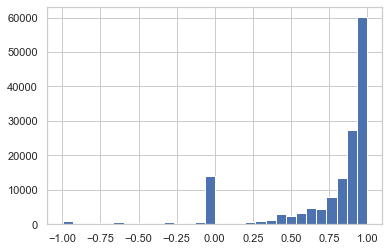

In [162]:
df['compound'].hist(bins = 30)

In [164]:
df = df[df['compound'] > 0]
df.shape

(129921, 11)

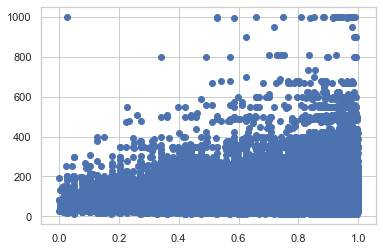

In [167]:
plt.scatter(df['compound'],df['price'])
plt.show()

In [168]:
df.sort_values(['compound'],ascending = False)

,id,price,listing_id,review_id,date,reviewer_id,reviewer_name,comments,score,compound,comp_score
83090,8591387,249.0,8591387,68979692,2016-04-08,7677913,Atif,\nWe got a great welcome!!! \n\nThere was some...,"{'neg': 0.006, 'neu': 0.666, 'pos': 0.328, 'co...",0.9994,pos
106705,4987269,65.0,4987269,279327779,2018-06-20,25404233,Sylvia,Staying with Sakshini was a great honour and p...,"{'neg': 0.0, 'neu': 0.59, 'pos': 0.41, 'compou...",0.9993,pos
37560,334310,36.0,334310,250252350,2018-04-04,43897066,Sameer,"Allan does justice to the term ""Superhost""!\n\...","{'neg': 0.0, 'neu': 0.726, 'pos': 0.274, 'comp...",0.9993,pos
85341,730765,225.0,730765,18346930,2014-08-25,8102431,Cristina,"We had a 2 weeks, really good stay in Rupert’...","{'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound...",0.9992,pos
113096,13520514,100.0,13520514,82398548,2016-06-27,17013173,Chirag,Highly Recommend Excellent Location Approximat...,"{'neg': 0.009, 'neu': 0.746, 'pos': 0.244, 'co...",0.9991,pos
32471,1796082,203.0,1796082,18146069,2014-08-22,16503360,Boaz,Everything is excellent about this apartment! ...,"{'neg': 0.0, 'neu': 0.671, 'pos': 0.329, 'comp...",0.9991,pos
95918,10820505,58.0,10820505,86686069,2016-07-17,71474618,Veronica,After more than two weeks traveling around the...,"{'neg': 0.005, 'neu': 0.747, 'pos': 0.248, 'co...",0.9991,pos
123145,8203315,40.0,8203315,253795784,2018-04-15,2679671,Gábor & Linda,I made a very last minute booking for Isabel's...,"{'neg': 0.01, 'neu': 0.599, 'pos': 0.392, 'com...",0.9991,pos
68046,12827223,65.0,12827223,224538617,2018-01-03,66518154,Mermaid,Rhian’s Home is So Lovely and Rhian is kind an...,"{'neg': 0.024, 'neu': 0.673, 'pos': 0.303, 'co...",0.9991,pos
17104,22477279,99.0,22477279,230139382,2018-01-27,2792249,Trish,Rachel's place is above and beyond what we exp...,"{'neg': 0.0, 'neu': 0.632, 'pos': 0.368, 'comp...",0.9990,pos


In [173]:
df.loc[df['review_id'] == 68979692,'comments'].values

array(['\nWe got a great welcome!!! \n\nThere was some issues with visa not for UK but for the trip ahead and David was like a family who adjusted to our needs. Everything we wished and desired of, like a true GentleMan and a true family member to welcomed us. \n\nWe were received by Paul, as David was away and it made no difference as Paul was so nice, one of the sweetest person I met in London, in a decade. And not forgetting he even helped us with 100kg\'s of baggage phewww and settled us well. \n\nWe got familiar with the house quickly, because after researching 200 properties personally I had chosen this wonderful apartment. So, i made sure I have everything to us, to my wife and kid. \n\nLocation was awsome and it was way too convenient for us, it is at a great locality and I loved every bit of it. \n\nThe apartment is so close to the centre of all. You could walk literally to any place if you are not tired, ofcourse! \n\nWe used Tube for 1 day and then just walked all destinatio

In [174]:
# group house by compound
# number of pos, number of neg

### save data 

In [ ]:
df.to_csv('review_sentiment_score.csv')

### group data

### merge with listing.csv 

# Vectorization

# Analyze reviews of specific person

### customer churn/ retain customer

In [52]:
review_df.reviewer_id.value_counts()

7222993.0      50
37816920.0     40
41071499.0     30
108832929.0    21
21813943.0     19
9769013.0      18
85331386.0     18
70273504.0     17
63116285.0     16
33430868.0     16
680044.0       15
5063588.0      14
14308677.0     14
125792111.0    14
182728993.0    13
99992671.0     13
80529454.0     13
59067496.0     13
43322529.0     12
65888531.0     12
111443955.0    12
2511427.0      12
14185109.0     12
11594962.0     11
78576766.0     11
126555237.0    11
25739972.0     11
39579522.0     11
14898023.0     11
210928370.0    11
77655206.0     10
40396872.0     10
139897597.0    10
40178213.0     10
137272634.0    10
88759478.0     10
11662385.0      9
126296511.0     9
108828296.0     9
88875840.0      9
149666534.0     9
32697194.0      9
56063164.0      8
60252847.0      8
129311175.0     8
16637585.0      8
58907636.0      8
60052457.0      8
8790584.0       8
1947611.0       8
16791573.0      8
6428099.0       8
1944363.0       8
188328976.0     8
21038452.0      8
28789870.0

In [55]:
review_df[review_df.reviewer_id == 43322529.0]

,id,price,listing_id,review_id,date,reviewer_id,reviewer_name,comments
6784,4920619,45.0,4920619.0,50111404.0,2015-10-09,43322529.0,Stewart,Many thanks to Rachel for hosting me in her lo...
6796,4920619,45.0,4920619.0,56332177.0,2015-12-12,43322529.0,Stewart,Another very pleasant stay with Rachel. The ro...
6803,4920619,45.0,4920619.0,61392767.0,2016-02-03,43322529.0,Stewart,Very comfortable stay with Rachel as per usual...
6808,4920619,45.0,4920619.0,63661197.0,2016-02-25,43322529.0,Stewart,Another very pleasant stay. Thanks again
6810,4920619,45.0,4920619.0,64469418.0,2016-03-04,43322529.0,Stewart,A great stay as always. Also new TV installed ...
148714,6503029,45.0,6503029.0,53849362.0,2015-11-13,43322529.0,Stewart,Thanks Dawn. I had a fantastic couple of nigh...
148718,6503029,45.0,6503029.0,58085103.0,2015-12-31,43322529.0,Stewart,Had a great stay as always and very kind of Da...
148719,6503029,45.0,6503029.0,62198004.0,2016-02-12,43322529.0,Stewart,As good a stay as aswells even when the lights...
148720,6503029,45.0,6503029.0,66810370.0,2016-03-24,43322529.0,Stewart,As great as stay as always with Dawn. Highly r...
148722,6503029,45.0,6503029.0,77646416.0,2016-06-02,43322529.0,Stewart,Another excellent stay with Dawn. Great breakf...


In [ ]:
df = 